In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/pm2.5.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df.shape

(43824, 13)

#### originally we have 43824 samples

In [4]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


#### Dropping samples with null values

In [5]:
df = df.dropna()
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


#### Dropping No column

In [6]:
df = df.drop('No', axis=1)
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


<AxesSubplot:>

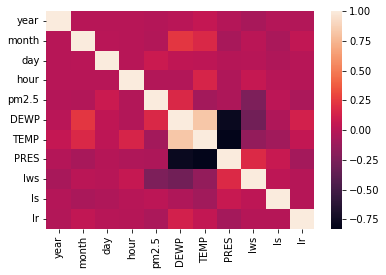

In [7]:
sns.heatmap(df.corr())

#### We can see that DEWP and TEMP are moderately correlated, but there aren't any very highly correlated attributes, so we do not need to drop any columns

#### Encoding the string data(cbwd column)

In [8]:
from category_encoders import OrdinalEncoder
dfOG = df
df = OrdinalEncoder(cols=['cbwd']).fit_transform(df)
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,1,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,1,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,1,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,1,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,1,6.25,2,0


In [9]:
train = df.sample(frac=0.7, random_state=0)
val = df.drop(train.index).sample(frac=0.5, random_state=0)
test = df.drop(np.concatenate((train.index, val.index)))

print('Training set size:', train.shape[0])
print('Validation set size:', val.shape[0])
print('Testing set size:', test.shape[0])

Training set size: 29230
Validation set size: 6264
Testing set size: 6263


#### Counts for each class

In [10]:
print(train['month'].value_counts())

7     2564
5     2534
10    2533
3     2491
12    2489
11    2452
1     2433
6     2391
4     2369
8     2339
2     2324
9     2311
Name: month, dtype: int64


#### Separating into target variable and feature vectors

In [11]:
x_train = train.drop('month', axis=1)
y_train = train['month']
x_val = val.drop('month', axis=1)
y_val = val['month']
x_test = test.drop('month', axis=1)
y_test = test['month']

## Part A

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_ent = DecisionTreeClassifier(criterion='entropy')
clf_gini.fit(x_train, y_train)
clf_ent.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
y_pred_g = clf_gini.predict(x_test)
y_pred_e = clf_ent.predict(x_test)

In [15]:
def accuracy(y, pred):
    return np.sum(y==pred) / len(y)

In [16]:
print('accuracy using gini index:', accuracy(y_pred_g, y_test))
print('accuracy using entropy:', accuracy(y_pred_e, y_test))

accuracy using gini index: 0.8055245090212358
accuracy using entropy: 0.832189046782692


#### Entropy has better accuracy so we will be using that for the following parts

## Part B

In [17]:
depths = [2, 4, 8, 10, 15, 30]
acc_train = []
acc_test = []
for i in range(len(depths)):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depths[i])
    clf.fit(x_train, y_train)
    yp1 = clf.predict(x_train)
    yp2 = clf.predict(x_test)
    acc_train.append(accuracy(yp1, y_train))
    acc_test.append(accuracy(yp2, y_test))

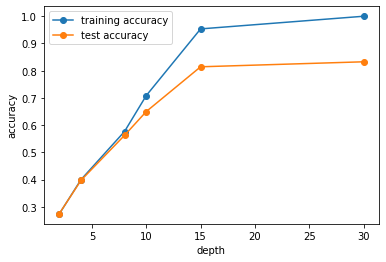

In [18]:
plt.plot(depths, acc_train, 'o-')
plt.plot(depths, acc_test, 'o-')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'test accuracy'])
plt.show()

#### The accuracy increases in both cases with increase in depth, the best results are given by depth 30

In [19]:
print('training acuuracy (depth 30):', acc_train[-1])
print('testing acuuracy (depth 30):', acc_test[-1])

training acuuracy (depth 30): 1.0
testing acuuracy (depth 30): 0.8326680504550535


## Part C

In [20]:
#from sklearn.ensemble import BaggingClassifier
#clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
#num_trees = 100
#model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, max_samples=0.5)
#clf.fit(x_train, y_train)
#temp = clf.predict(x_test)
#accuracy(temp, y_test)

In [21]:
preds1 = []
preds2 = []
for i in range(100):
    data = train.sample(frac=0.5)
    x = data.drop('month', axis=1)
    y = data['month']
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x, y)
    preds1.append(clf.predict(x_train))
    preds2.append(clf.predict(x_test))

In [22]:
from statistics import mode
preds1 = np.array(preds1)
preds2 = np.array(preds2)
majority1 = []
majority2 = []
for i in range(len(x_train)):
    majority1.append(mode(preds1[:, i]))
for i in range(len(x_test)):
    majority2.append(mode(preds2[:, i]))

In [23]:
print('Training accuracy:', accuracy(majority1, y_train))
print('Testing accuracy:', accuracy(majority2, y_test))

Training accuracy: 0.35203557988368117
Testing accuracy: 0.343445633083187


#### Ensembling with depth 3 trees does not lead to very good results, with an accuracy of around 34% for both training and test sets. This is similar to the performance of a single tree of depth 3 from the graph in part B
#### A single tree lead to more than 80% accuracy using the default parameters in part A, and also with more depth in part B, which means our ensemble is limited due to the small depth of the individual trees.

## Part D

In [24]:
def trainer(ntree, depth):
    trees = []
    for i in range(ntree):
        data = train.sample(frac=0.5)
        x = data.drop('month', axis=1)
        y = data['month']
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth).fit(x, y)
        trees.append(clf)
    return trees

def predictor(trees, xpred):
    preds = []
    for tree in trees:
        preds.append(tree.predict(xpred))
    preds = np.array(preds)
    majority = []
    for i in range(len(xpred)):
        majority.append(mode(preds[:, i]))
    return majority

In [25]:
depths = [4, 8, 10, 15, 20, 30]
treenums = [5, 10, 20, 50, 100, 200]

In [27]:
acctrain = []
accval = []
acctest = []

for depth in depths:
    for num in treenums:
        trees = trainer(num, depth)
        acctrain.append(predictor(trees, x_train))
        accval.append(predictor(trees, x_val))
        acctest.append(predictor(trees, x_test))

In [51]:
trainmat = np.zeros((6, 6))
valmat = np.zeros((6, 6))
testmat = np.zeros((6, 6))

for i in range(36):
    row = i // 6
    col = i % 6
    trainmat[row][col] = accuracy(acctrain[i], y_train)
    valmat[row][col] = accuracy(accval[i], y_val)
    testmat[row][col] = accuracy(acctest[i], y_test)

In [53]:
traindf = pd.DataFrame(data = trainmat, index = depths, columns = treenums)
valdf = pd.DataFrame(data = valmat, index = depths, columns = treenums)
testdf = pd.DataFrame(data = testmat, index = depths, columns = treenums)

## Accuracy heatmap
#### Rows are the depths and columns are the number of trees

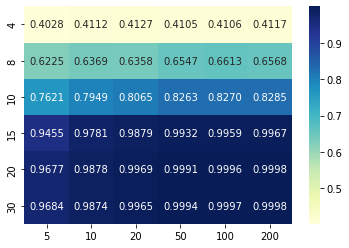

In [73]:
# Traning accuracy
sns.heatmap(traindf, annot=True, cmap='YlGnBu', fmt='.4f')
plt.show()

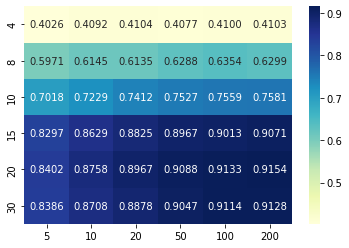

In [76]:
# Validation accuracy
sns.heatmap(valdf, annot=True, cmap='YlGnBu', fmt='.4f')
plt.show()

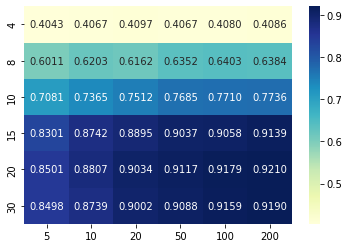

In [75]:
# Testing accuracy
sns.heatmap(testdf, annot=True, cmap='YlGnBu', fmt='.4f')
plt.show()

#### All 3 graphs follow similar patterns, initial accuracy is heavily dependent on depth but not on the number of trees.
#### As the max depth increases, the number of trees has more influence on the accuracy

#### For training set, increasing the value of the parameters increases the accuracy, this makes sense because as the model becomes more complex it is able to better fit to the training data. There are highly diminishing returns after about 20 depth and 20 trees as the model is close to perfect

#### For validation set, increasing the number of trees does increase performance, but depth 20 gives better results than depth 30. This is because as the depth increases the model becomes more complex and starts overfitting on the training data

#### For testing set, the results are similar to the validation set. Depth 20 gives the best results, and after 20-30 trees there are very minimal improvements to the accuracy.

### Depth 20 is chosen as it gives us the best results and avoid overfitting

## Part E

In [79]:
n_est = [4, 8, 10, 15, 20]

In [80]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [101]:
accs = []

for num in n_est:
    clf = AdaBoostClassifier(base_estimator=tree, n_estimators=num, random_state=1)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accs.append(accuracy(pred, y_test))

In [106]:
print('num est.:', n_est)
print('accuracy:', accs)

num est.: [4, 8, 10, 15, 20]
accuracy: [0.872425355261057, 0.9018042471658949, 0.8962158709883442, 0.8895098195752834, 0.8895098195752834]


#### ADAboost is stochastic process so there are variations in the result, but generally 8, 10, 15 estimators give us consistently high accuracy of around 89%

#### Performance is similar to Random forest with 20 depth, with both giving around 90%. But Random Forest is not susceptible to variance, so it may be the better choice here